In [13]:
from os import path
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, MaxNLocator
import scipy.io as sio
from scipy.signal import savgol_filter
from brainpipe.visual import *
from brainpipe.system import study

-> respi loaded
files in pow mat ['BA', 'f', 'aal', 'xyz', 'labels', 'channels', 'fname', 'pow']
before (210, 60) (32, 60)
Size of the concatenated data:  (242, 60) Number time windows :  60
Size of label for classif:  242


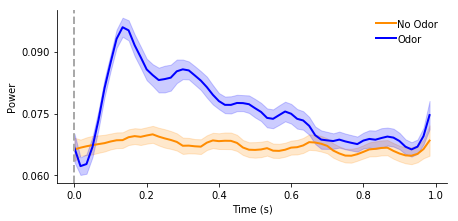

files in pow mat ['BA', 'f', 'aal', 'xyz', 'labels', 'channels', 'fname', 'pow']
before (210, 60) (32, 60)
Size of the concatenated data:  (242, 60) Number time windows :  60
Size of label for classif:  242


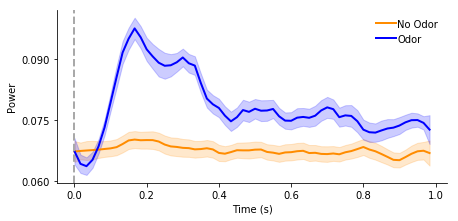

In [35]:
conds,cycles, subjects = ['no_odor','odorall'],['_reshape',''],['SEMC']
color_codes = ['darkorange','blue']
nb_points_cycle = 60
st = study('respi')

path_pow = path.join(st.path, 'Power_reshape/test/test2/')

for su,cycle in product(subjects,cycles):
    #=========================== Load Power files (nfreq, nelec, nwin, ntrial) =================================    
    mat0 = np.load(path.join(path_pow, su+'_E_'+conds[0]+'_pow'+cycle+'_'+str(nb_points_cycle)+'.npz'))
    mat1 = np.load(path.join(path_pow, su+'_E_'+conds[1]+'_pow'+cycle+'_'+str(nb_points_cycle)+'.npz'))
    print('files in pow mat', mat0.files)
    names, channels, freq_names = mat0['labels'], mat0['channels'],mat0['fname']
    freq_names = [freq.decode("utf-8") for freq in freq_names]
    time = np.arange(0.,1.,1/nb_points_cycle)
    
    #power dimensions // nelecs, nfreqs, ncycles, ntimepoints
    pow0, pow1 = mat0['pow'][:,-1,:,:].squeeze(), mat1['pow'][:,-1,:,:].squeeze()
    print('before',pow0.shape,pow1.shape)
    x = np.concatenate((pow0,pow1), axis=0)
    print ('Size of the concatenated data: ', x.shape, 'Number time windows : ', x.shape[1])
    y = [0] * pow0.shape[0] + [1] * pow1.shape[0]
    print ('Size of label for classif: ', len(y))
    
    x = savgol_filter(x, 11, 3, axis=1)
#     x = x - x.mean(axis=1, keepdims=True)
    
    
    
    # plot and figure parameters
    xfmt = ScalarFormatter(useMathText=True)
    xfmt.set_powerlimits((0,3))
    fig = plt.figure(1,figsize=(7,7))

    # Plot the POW + STATS
    plt.subplot(211)        
    BorderPlot(time, x, y=y, kind='sem', alpha=0.2, color=color_codes,linewidth=2, 
               ncol=1, xlabel='Time (s)',ylabel = r'Power', legend=['No Odor','Odor'])
    rmaxis(plt.gca(), ['right', 'top'])
    addLines(plt.gca(), vLines=[0], vColor=['darkgray'], vWidth=[2])
    plt.legend(loc=0, handletextpad=0.1, frameon=False)
    plt.gca().yaxis.set_major_locator(MaxNLocator(3,integer=True))
    plt.show()
